# Exploración de datos
### Security Data Science -- Laboratorio 3
#### Adrian Rodriguez 21619
#### Jose Daniel Gomez Cabrera 21429

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Cargar el dataset

In [3]:
df = pd.read_csv('./data/MalBehavD-V1-dataset.csv')

Obtener muestra de los datos

In [4]:
print(df.head(2))

                                              sha256  labels             0  \
0  5c18291c481a192ed5003084dab2d8a117fd3736359218...       0  LdrUnloadDll   
1  4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...       0  NtOpenMutant   

                     1           2                  3                     4  \
0       CoUninitialize  NtQueryKey  NtDuplicateObject     GetShortPathNameW   
1  GetForegroundWindow  NtQueryKey        DrawTextExW  NtSetInformationFile   

                  5                       6                           7  ...  \
0     GetSystemInfo       IsDebuggerPresent  GetSystemWindowsDirectoryW  ...   
1  RegQueryValueExA  LdrGetProcedureAddress              CoUninitialize  ...   

  Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170 Unnamed: 171  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 172 Unnamed: 173 Unnamed: 174 Unnamed: 175 Unnamed: 176  
0     

Dimensionalidades e información del dataset

In [5]:
print("\nDimensiones del dataset:", df.shape)
print(df.info())


Dimensiones del dataset: (2570, 177)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Columns: 177 entries, sha256 to Unnamed: 176
dtypes: int64(1), object(176)
memory usage: 3.5+ MB
None


Valores unicos en la columna 'labels'

In [6]:
print("\nValores únicos en la columna 'labels':")
print(df['labels'].value_counts())


Valores únicos en la columna 'labels':
labels
0    1285
1    1285
Name: count, dtype: int64


Valores faltantes por columna

In [7]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
sha256             0
labels             0
0                  0
1                  0
2                  6
                ... 
Unnamed: 172    2569
Unnamed: 173    2569
Unnamed: 174    2569
Unnamed: 175    2569
Unnamed: 176    2569
Length: 177, dtype: int64


Distribucion de las secuencias API

In [8]:
api_counts = {}
for i in range(df.shape[0]):
    # Contar cuántas APIs tiene cada muestra (eliminando NaN)
    row = df.iloc[i, 2:].dropna()
    api_counts[i] = len(row)

In [9]:
print("\nEstadísticas de la cantidad de APIs por muestra:")
api_counts_series = pd.Series(api_counts)
print(api_counts_series.describe())


Estadísticas de la cantidad de APIs por muestra:
count    2570.000000
mean       43.187938
std        29.710582
min         2.000000
25%        20.000000
50%        37.000000
75%        58.000000
max       175.000000
dtype: float64


Visualizamos la cantidad de APIs en funcion de la muestra

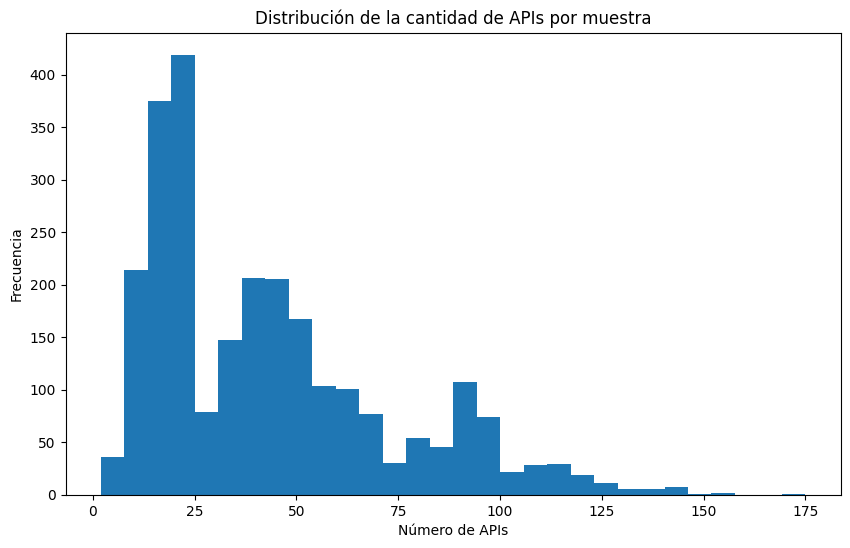

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(api_counts_series, bins=30)
plt.title('Distribución de la cantidad de APIs por muestra')
plt.xlabel('Número de APIs')
plt.ylabel('Frecuencia')
plt.savefig('./data-exploration/api_distribution.png')

Cuales son las APIs más comunes?

In [11]:
all_apis = []
for i in range(df.shape[0]):
    apis = df.iloc[i, 2:].dropna().tolist()
    all_apis.extend(apis)

In [12]:
api_frequency = pd.Series(all_apis).value_counts()

print("\nLas 20 APIs más comunes:")
print(api_frequency.head(20))


Las 20 APIs más comunes:
NtClose                    2524
NtQueryValueKey            2447
NtOpenKey                  2446
LdrGetProcedureAddress     2324
NtCreateFile               2181
NtAllocateVirtualMemory    2173
LdrUnloadDll               2139
RegCloseKey                1936
LdrGetDllHandle            1922
LdrLoadDll                 1894
NtFreeVirtualMemory        1891
GetSystemTimeAsFileTime    1796
NtReadFile                 1596
NtTerminateProcess         1544
NtMapViewOfSection         1539
NtCreateSection            1473
NtWriteFile                1455
RegOpenKeyExW              1433
RegQueryValueExW           1339
GetFileAttributesW         1338
Name: count, dtype: int64


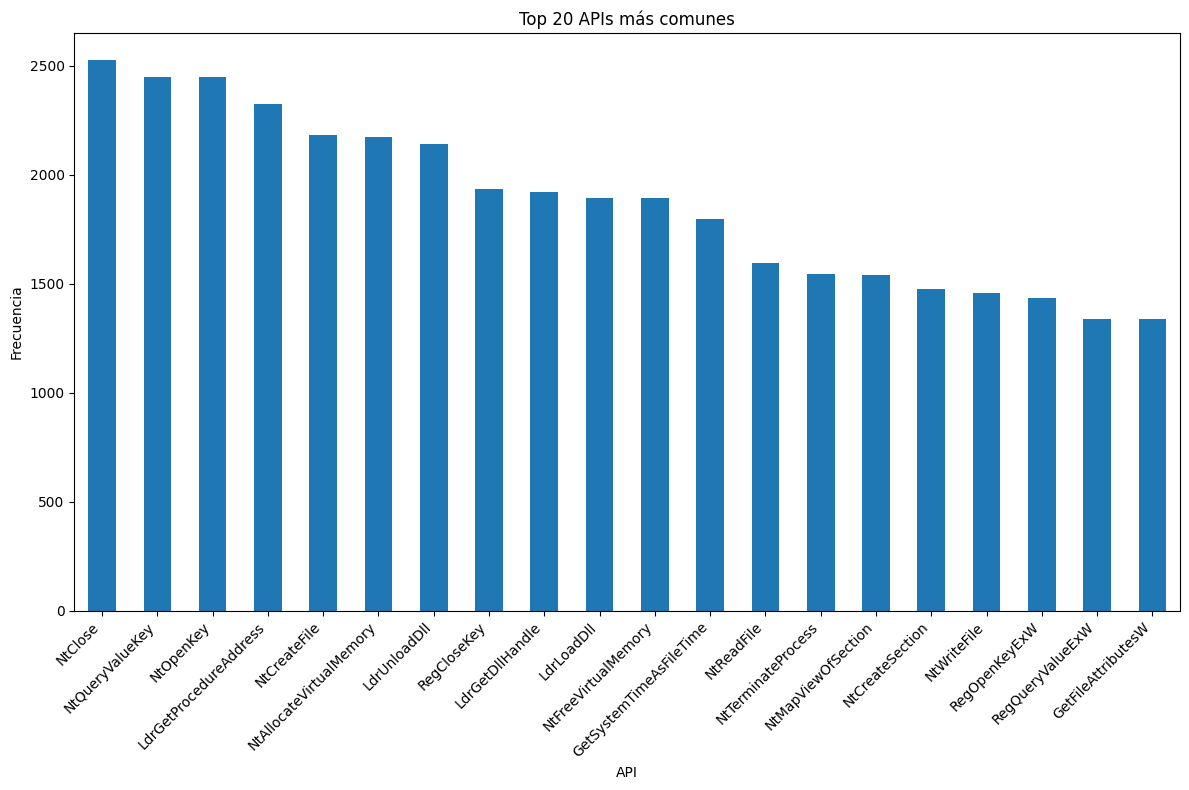

In [13]:
plt.figure(figsize=(12, 8))
api_frequency.head(20).plot(kind='bar')
plt.title('Top 20 APIs más comunes')
plt.xlabel('API')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./data-exploration/top_apis.png')


Distribución de las clases:
labels
0    1285
1    1285
Name: count, dtype: int64


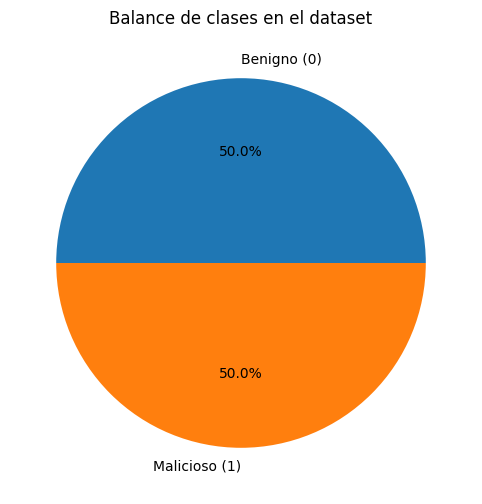

In [16]:
# Analizamos el balance del dataset
label_counts = df['labels'].value_counts()
print("\nDistribución de las clases:")
print(label_counts)


plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Benigno (0)', 'Malicioso (1)'], autopct='%1.1f%%')
plt.title('Balance de clases en el dataset')
plt.savefig('./data-exploration/class_balance.png')
